회귀 계수(기울기): 998.5777
절편: 152.0034
결정계수(R-squared): 0.2334
모델이 데이터의 23.34%를 설명합니다.
비용 함수 값(오차 제곱합 평균): 4061.8259


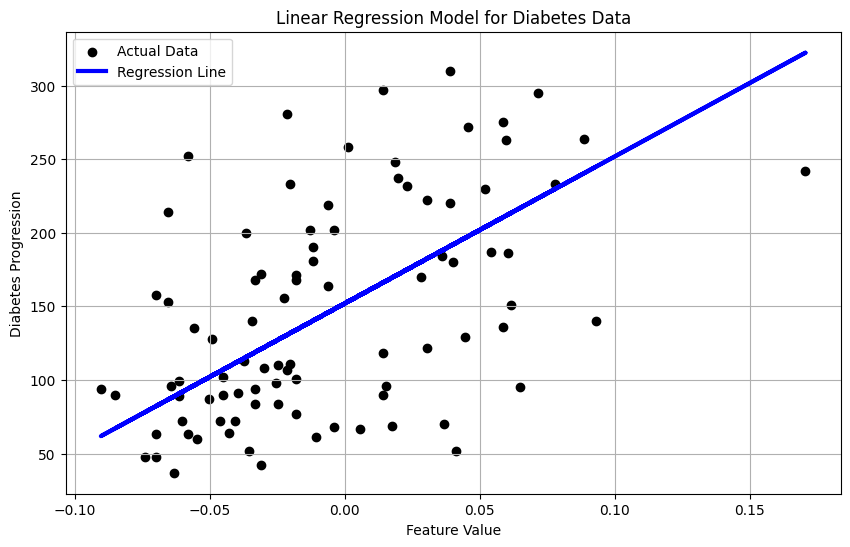

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 당뇨병 환자 데이터 로드
diabetes = datasets.load_diabetes()
X = diabetes.data  # 독립변수
y = diabetes.target  # 종속변수

# 간단한 모델을 위해 하나의 특성만 선택
X_single = X[:, 2].reshape(-1, 1)  # 세 번째 특성만 사용

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
regr = LinearRegression()

# 모델 훈련 (최소제곱추정 수행)
regr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = regr.predict(X_test)

# 모델 계수 확인
print(f"회귀 계수(기울기): {regr.coef_[0]:.4f}")
print(f"절편: {regr.intercept_:.4f}")

# 모델 평가 (R-squared: 결정계수)
r2 = r2_score(y_test, y_pred)
print(f"결정계수(R-squared): {r2:.4f}")
print(f"모델이 데이터의 {r2*100:.2f}%를 설명합니다.")

# 비용 함수(Cost Function) 직접 계산 
def cost_function(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

cost = cost_function(y_test, y_pred)
print(f"비용 함수 값(오차 제곱합 평균): {cost:.4f}")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.title('Linear Regression Model for Diabetes Data')
plt.xlabel('Feature Value')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.grid(True)
plt.show()
